##### ATPA 2.4 - Relational Databases

In [2]:
# Chunk 1: Load directory data
import pandas as pd
directory = pd.read_csv("Data/directory.csv")
directory

,Name,Position,Extension,Office
0,Fred Jones,Marketing,7110,B15
1,Dan Stevens,Development,7189,B19
2,Fred Jones,Marketing,7110,B15
3,Tasha Banks,Management,7634,C22
4,Dan Stevens,Development,7189,C12


In [3]:
# Chunk 2: Exclude exact duplicate records
# Exclude exact duplicate records
directory.drop_duplicates()

,Name,Position,Extension,Office
0,Fred Jones,Marketing,7110,B15
1,Dan Stevens,Development,7189,B19
3,Tasha Banks,Management,7634,C22
4,Dan Stevens,Development,7189,C12


In [4]:
# Chunk 3: Exclude duplicate of a specific variable
# Exclude duplicate of a specific variable
directory.drop_duplicates("Name")

,Name,Position,Extension,Office
0,Fred Jones,Marketing,7110,B15
1,Dan Stevens,Development,7189,B19
3,Tasha Banks,Management,7634,C22


In [5]:
# Chunk 4: Exclude duplicates, keeping the closest to end
# Exclude duplicates, keeping the closest to end
directory.drop_duplicates("Name",keep="last")

,Name,Position,Extension,Office
2,Fred Jones,Marketing,7110,B15
3,Tasha Banks,Management,7634,C22
4,Dan Stevens,Development,7189,C12


In [6]:
# Chunk 5:Exclude duplicate columns
# Exclude duplicate columns
var_data = pd.DataFrame({"Var1":[1,2,3],"Var2":[4,5,6],"Var3":[1,2,3]})
var_data.T.drop_duplicates().T

,Var1,Var2
0,1,4
1,2,5
2,3,6


In [8]:
# Chunk 6: Exercise 2.5.1
flights = pd.read_csv("Data/flights.csv")
flights.sched_dep_time.describe()

count    336776.000000
mean       1344.254840
std         467.335756
min         106.000000
25%         906.000000
50%        1359.000000
75%        1729.000000
max        2359.000000
Name: sched_dep_time, dtype: float64

336776


0    515
1    529
2    540
3    545
4    600
5    558
6    600
7    600
8    600
9    600
Name: sched_dep_time, dtype: int64

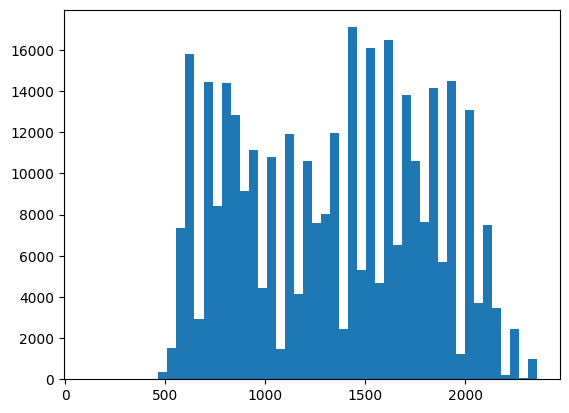

In [16]:
import matplotlib.pyplot as plt
print(flights.shape[0])
plt.hist(flights.sched_dep_time, bins = 50);

flights.sched_dep_time[:10]

In [33]:
pd.set_option('display.max_columns', None)
youth_risk.head(2)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Gender,Grade,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2019,2019,AL,Alabama,Youth Risk Behavior Surveillance System,Sugar Drinks,Sugar Drinks - Behavior,Percent of students in grades 9-12 who drank r...,NaN,Value,30.8,30.8,NaN,NaN,21.7,41.8,145.0,NaN,NaN,NaN,Hispanic,"(32.840571122, -86.631860762)",SD,SD1,Q058,VALUE,1,Race/Ethnicity,Hispanic,RACE,RACEHIS
1,2019,2019,ID,Idaho,Youth Risk Behavior Surveillance System,Sugar Drinks,Sugar Drinks - Behavior,Percent of students in grades 9-12 who drank r...,NaN,Value,13.0,13.0,NaN,NaN,9.0,18.4,240.0,NaN,NaN,NaN,Hispanic,"(43.682630005, -114.363730042)",SD,SD1,Q058,VALUE,16,Race/Ethnicity,Hispanic,RACE,RACEHIS


In [51]:
# Chunk 7: Exercise 2.5.2
youth_risk = pd.read_csv("Data/youth_risk.csv")

# # 1. Check for duplicate columns that repeat the same values or the same information.
# print("There are {} rows and {} columns in the youth_risk original data".format(youth_risk.shape[0], youth_risk.shape[1]))
# y_r2 = youth_risk.T.drop_duplicates().T
# print("There are {} rows and {} columns in the y_r2 data".format(y_r2.shape[0], y_r2.shape[1]))

# # 2. Check for duplicate rows.
# print("There are {} rows and {} columns in the youth_risk original data".format(y_r2.shape[0], y_r2.shape[1]))
# y_r3 = y_r2.drop_duplicates()
# print("There are {} rows and {} columns in the y_r2 data".format(y_r3.shape[0], y_r3.shape[1]))

# 3. The percentage values are recorded as the variable Data_Value. Check that all those values are in the proper domain.
y_r3.Data_Value.describe()
((y_r3.Data_Value >= 0.) & (y_r3.Data_Value <= 100.)).mean()

y_r3.Data_Value.dropna()
y_r3.Data_Value.max()

# 4. Check that the Data_Value falls within the interval of Low_Confidence_Interval to High_Confidence_Interval
((y_r3.Low_Confidence_Limit < y_r3.Data_Value) & (y_r3.loc[:,"High_Confidence_Limit "] > y_r3.Data_Value)).mean() # all just from NaNs


# 5. The Data_Value for individual strata should be correlated with the Data_Value for the total sample within each state. Find the correlation between the Total Data_Value and the 11th Grade Strata by state. To do this, filter by Stratification1 being equal to “Total” and then “11th”. Group by state and find the mean. Plot the relationship by state. Does it seem to be internally consistent


0.7346867517956903

In [ ]:
# Chunk 8: Exercise 2.5.2: Solution
youth_risk = pd.read_csv("Data/youth_risk.csv")

# 1. Check for duplicate columns that repeat the same values or the same information.
youth_risk.shape[1]
youth_risk.T.drop_duplicates().T.shape[1]
# Two columns were duplicated

# 2. Check for duplicate rows.
youth_risk.shape[0]
youth_risk.drop_duplicates().shape[0]
# No exact duplicate rows

# 3. The percentage values are recorded as the variable Data_Value. Check that all those values are in the proper domain.
youth_risk.Data_Value.max() <= 100
youth_risk.Data_Value.min() >= 0
# All values are in the appropriate range

# 4. Check that the Data_Value falls within the interval of Low_Confidence_Interval to High_Confidence_Interval

youth_vals = youth_risk[["Data_Value","Low_Confidence_Limit","High_Confidence_Limit "]].dropna()
all(youth_vals.Data_Value >= youth_vals.Low_Confidence_Limit)
all(youth_vals.Data_Value <= youth_vals["High_Confidence_Limit "])
# All values make sense

# 5. The Data_Value for individual strata should be correlated with the Data_Value for the total sample within each state. Find the correlation
# between the Total Data_Value and the 11th Grade Strata by state. To do this, filter by Stratification1 being equal to “Total” and then “11th”.
# Group by state and find the mean. Plot the relationship by state. Does it seem to be internally consistent

import matplotlib.pyplot as plt
total = youth_risk.query("Stratification1 == 'Total'").groupby("LocationAbbr").agg({"Data_Value":"mean"})
Grade11 = youth_risk.query("Stratification1 == '11th'").groupby("LocationAbbr").agg({"Data_Value":"mean"})
plotdat = Grade11.merge(total,on="LocationAbbr",how="left")
plotdat.columns = ["Grade11","Total"]
plt.plot(plotdat["Grade11"],plotdat["Total"],"o",color="black")
plt.xlabel("11th Grade Health Scores")
plt.ylabel("Total Health Scores")
plt.show()
# The correlation is very close to 1 and the plot shows a very strong relationship. This suggests that the variables are consistent with respect to each other.

